# $k$-armed bandits-Gaussian using (Optimistic) incremental $\epsilon$-greedy algortihm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Incrementally computed

In [62]:
class K_ArmedBandits:

    def __init__(self, parameters, lrt, n_iter=1, eps=0, stds = None):
        
        """
        parameters: a list of length n_arms containing means corresponding to the distributions
        stds: list of standard deviations corresponding to the distributions
        lrt: a float number or a fuction determinig the learning rate
        
        """
        self.n_arms = len(parameters)
        self.parameters = np.array(parameters)
        
        if stds is None:
            self.stds = np.ones_like(self.parameters)
        else:
            self.stds = np.array(stds)
            
            
 

        self.counter = np.zeros(self.n_arms)
        self.eps = eps
        
        self.optimum_actions_percentage = np.zeros(n_iter)
        self.bestaction = np.where(self.parameters >= np.max(self.parameters-1e-12))[0].tolist()

        
        self.play(n_iter)
      
    
    
    def play(self, n_iter):
        
        self.Q = np.zeros(self.n_arms)        
        reward = 0
        sum_reward = 0
        n_best_action = 0
        self.Mean_Rewards = []
        self.Rewards = []
        
        for i in range(n_iter):
            
            idx = self.Policy()
            if idx in self.bestaction:
                n_best_action += 1
            self.optimum_actions_percentage[i] = n_best_action/(i+1)
                
            reward = self.Step_Reward(idx)
            sum_reward += reward
            self.Mean_Rewards.append(sum_reward/(i+1))
            self.Rewards.append(reward)
            
            if isinstance(lrt , float):
                self.Q[idx] = self.Q[idx] + lrt * (reward - self.Q[idx])
            else: 
                self.Q[idx] = self.Q[idx] + lrt(self.counter[idx]) * (reward - self.Q[idx])

        
    def Step_Reward(self, arm_number):      
        return np.random.normal(loc = self.parameters[arm_number], scale = self.stds[arm_number])

    
    def Policy(self):

        if np.random.rand() <= self.eps:
            idx = np.random.randint(0,self.n_arms)

        else:
            idx = np.random.choice(
                np.where(self.Q >= np.max(self.Q))[0]
            )
            
        self.counter[idx] += 1
        
            
        
        return idx  
    
def lrt(n):
    return 1/n

In [3]:
model = K_ArmedBandits([3, 4, 25, -8, 6, -10], lrt = lrt, n_iter=10000, eps=.1)

In [4]:
model.Q

array([  3.05058364,   3.8793311 ,  25.01384893,  -7.88169868,
         6.01978194, -10.12328442])

In [5]:
model.Mean_Rewards[-1]

22.73008530558831

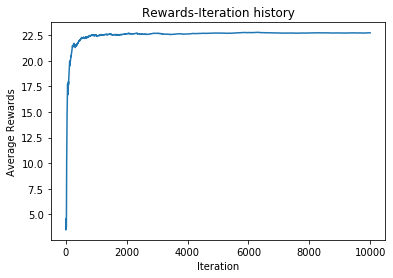

In [6]:
plt.plot(model.Mean_Rewards)
plt.xlabel('Iteration')
plt.ylabel('Average Rewards')
plt.title('Rewards-Iteration history')
plt.show()

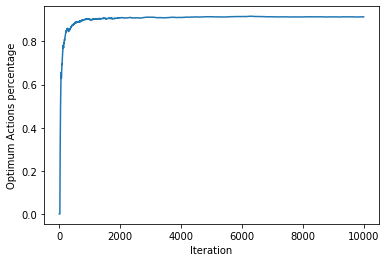

In [7]:
plt.plot(model.optimum_actions_percentage)
plt.xlabel('Iteration')
plt.ylabel('Optimum Actions percentage')
#plt.title('Rewards-Iteration history')
plt.show()

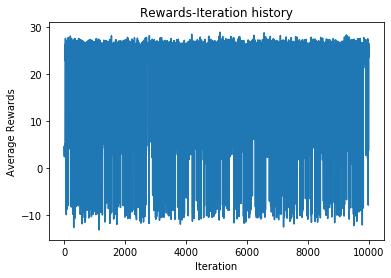

In [8]:
plt.plot(model.Rewards)
plt.xlabel('Iteration')
plt.ylabel('Average Rewards')
plt.title('Rewards-Iteration history')
plt.show()

In [9]:
mus = np.random.normal(loc = 0, scale = 20.0, size = 10)
m_max = np.max(mus)
mus.shape

(10,)

In [10]:
model = K_ArmedBandits(mus, lrt = lrt, n_iter=100000, eps=.1)
np.abs(model.Q - mus)

array([0.02869153, 0.01325145, 0.03851772, 0.06433292, 0.03470716,
       0.00664893, 0.00970513, 0.02986011, 0.06841947, 0.0019315 ])

In [11]:
model = K_ArmedBandits(mus, lrt = .01, n_iter=100000, eps=.1)
np.abs(model.Q - mus)

array([4.76957874e-03, 6.93805130e-03, 4.98743181e-03, 3.22280445e-02,
       6.66363025e-04, 2.54561839e-05, 1.62949211e-02, 3.75784258e-03,
       3.54636291e-02, 4.34105283e-02])

# Stationary Problem

In this situation we set step_size to be $1/n$.

In [12]:
n_iter = 1000
n_episodes = 200

Average_Mean_Rewards_history_1 = np.zeros(n_iter)
Average_Mean_Rewards_history_2 = np.zeros(n_iter)
Average_Mean_Rewards_history_3 = np.zeros(n_iter)


Average_Rewards_history_1 = np.zeros(n_iter)
Average_Rewards_history_2 = np.zeros(n_iter)
Average_Rewards_history_3 = np.zeros(n_iter)


Bestaction_history_1 = np.zeros(n_iter)
Bestaction_history_2 = np.zeros(n_iter)
Bestaction_history_3 = np.zeros(n_iter)


for i in range(n_episodes):
    
    mus = np.random.normal(loc = 0.0, scale = 1.0, size = 10)    
    
    model = K_ArmedBandits(mus, lrt = lrt, n_iter=n_iter, eps=.1)
    Average_Mean_Rewards_history_1 += model.Mean_Rewards
    Average_Rewards_history_1 += model.Rewards
    Bestaction_history_1 += model.optimum_actions_percentage
    
    
    
    model = K_ArmedBandits(mus, lrt = lrt, n_iter=n_iter, eps=.01)
    Average_Mean_Rewards_history_2 += model.Mean_Rewards
    Average_Rewards_history_2 += model.Rewards
    Bestaction_history_2 += model.optimum_actions_percentage
    
    
    model = K_ArmedBandits(mus, lrt = lrt, n_iter=n_iter, eps=0)
    Average_Mean_Rewards_history_3 += model.Mean_Rewards
    Average_Rewards_history_3 += model.Rewards 
    Bestaction_history_3 += model.optimum_actions_percentage

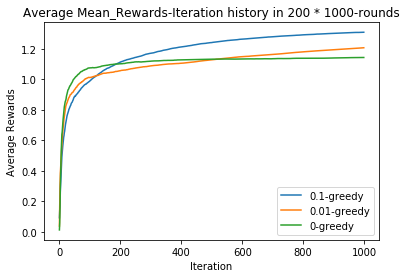

In [13]:
plt.plot(Average_Mean_Rewards_history_1/200, label = "0.1-greedy")
plt.plot(Average_Mean_Rewards_history_2/200, label = "0.01-greedy")
plt.plot(Average_Mean_Rewards_history_3/200, label = "0-greedy")
plt.xlabel('Iteration')
plt.ylabel('Average Rewards')
plt.title('Average Mean_Rewards-Iteration history in 200 * 1000-rounds')
plt.legend()
plt.show()

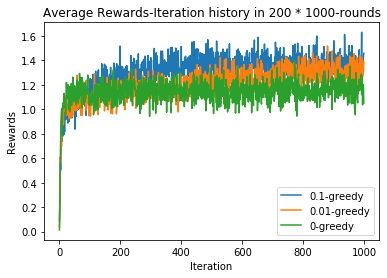

In [15]:
plt.plot(Average_Rewards_history_1/200, label = "0.1-greedy")
plt.plot(Average_Rewards_history_2/200, label = "0.01-greedy")
plt.plot(Average_Rewards_history_3/200, label = "0-greedy")
plt.xlabel('Iteration')
plt.ylabel('Rewards')
plt.title('Average Rewards-Iteration history in 200 * 1000-rounds')
plt.legend()
plt.show()

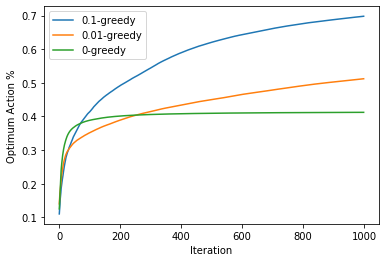

In [16]:
plt.plot(Bestaction_history_1/200, label = "0.1-greedy")
plt.plot(Bestaction_history_2/200, label = "0.01-greedy")
plt.plot(Bestaction_history_3/200, label = "0-greedy")
plt.xlabel('Iteration')
plt.ylabel('Optimum Action %')
#plt.title('Average Mean_Rewards-Iteration history in 400 * 2000-rounds')
plt.legend()
plt.show()

# Nonstationary Problem

In this situation we set step_size to be $0.1$.

In [37]:
class K_ArmedBandits_Nonstationary(K_ArmedBandits):
    
    def __init__(self, parameters, lrt, n_iter=1, eps=0, stds = None):
        super().__init__(parameters, lrt, n_iter, eps, stds)      
    
    def play(self, n_iter):
        
        self.Q = np.zeros(self.n_arms)        
        reward = 0
        sum_reward = 0
        n_best_action = 0
        self.Mean_Rewards = []
        self.Rewards = []
        
        for i in range(n_iter):
            
            idx = self.Policy()
            if idx in self.bestaction:
                n_best_action += 1
            self.optimum_actions_percentage[i] = n_best_action/(i+1)
                
            reward = self.Step_Reward(idx)
            sum_reward += reward
            self.Mean_Rewards.append(sum_reward/(i+1))
            self.Rewards.append(reward)
            
            if isinstance(lrt , float):
                self.Q[idx] = self.Q[idx] + lrt * (reward - self.Q[idx])
            else: 
                self.Q[idx] = self.Q[idx] + lrt(self.counter[idx]) * (reward - self.Q[idx])
            
            
        
            
            self.parameters += np.random.normal(loc = 0, scale = 0.01, size = self.n_arms)
        
            self.bestaction = np.where(self.parameters >= np.max(self.parameters)-1e-12)[0].tolist()    

In [38]:
n_iter = 10000
n_episodes = 200

Average_Mean_Rewards_history_1 = np.zeros(n_iter)
Average_Mean_Rewards_history_2 = np.zeros(n_iter)


Average_Rewards_history_1 = np.zeros(n_iter)
Average_Rewards_history_2 = np.zeros(n_iter)


Bestaction_history_1 = np.zeros(n_iter)
Bestaction_history_2 = np.zeros(n_iter)


for i in range(n_episodes):
    
    mus = np.random.normal(loc = 0.0, scale = 1.0, size = 10)
    
    
    model = K_ArmedBandits_Nonstationary(mus, lrt = lrt, n_iter=n_iter, eps=.1)
    Average_Mean_Rewards_history_1 += model.Mean_Rewards
    Average_Rewards_history_1 += model.Rewards
    Bestaction_history_1 += model.optimum_actions_percentage
    
    
    
    model = K_ArmedBandits_Nonstationary(mus, lrt = .1, n_iter=n_iter, eps=.1)
    Average_Mean_Rewards_history_2 += model.Mean_Rewards
    Average_Rewards_history_2 += model.Rewards
    Bestaction_history_2 += model.optimum_actions_percentage
    

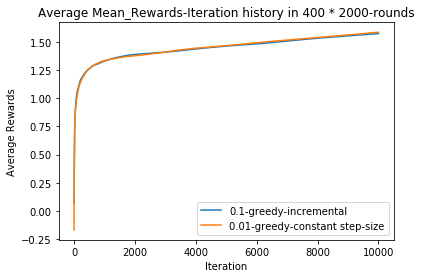

In [39]:
plt.plot(Average_Mean_Rewards_history_1/n_episodes, label = "0.1-greedy-incremental")
plt.plot(Average_Mean_Rewards_history_2/n_episodes, label = "0.01-greedy-constant step-size")
plt.xlabel('Iteration')
plt.ylabel('Average Rewards')
plt.title('Average Mean_Rewards-Iteration history in 400 * 2000-rounds')
plt.legend()
plt.show()

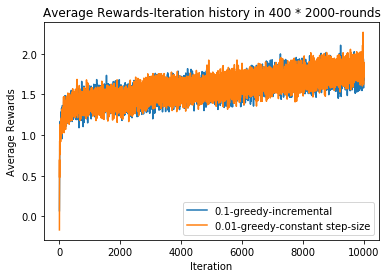

In [40]:
plt.plot(Average_Rewards_history_1/n_episodes, label = "0.1-greedy-incremental")
plt.plot(Average_Rewards_history_2/n_episodes, label = "0.01-greedy-constant step-size")
plt.xlabel('Iteration')
plt.ylabel('Average Rewards')
plt.title('Average Rewards-Iteration history in 400 * 2000-rounds')
plt.legend()
plt.show()

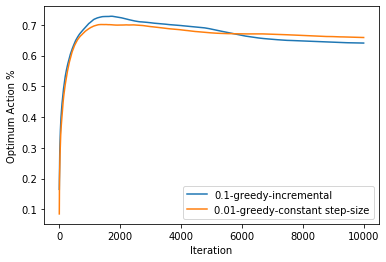

In [41]:
plt.plot(Bestaction_history_1/n_episodes, label = "0.1-greedy-incremental")
plt.plot(Bestaction_history_2/n_episodes, label = "0.01-greedy-constant step-size")
plt.xlabel('Iteration')
plt.ylabel('Optimum Action %')
#plt.title('Average Mean_Rewards-Iteration history in 400 * 2000-rounds')
plt.legend()
plt.show()

# Optimistic Initial Values

In [42]:
class K_ArmedBandits_Optimistic(K_ArmedBandits):
    
    def __init__(self, parameters, lrt, initial_Q, n_iter=1, eps=0, stds = None):
        
        self.Q = initial_Q
        super().__init__(parameters, lrt, n_iter, eps, stds)  
                       
            
    def play(self, n_iter):
        reward = 0
        sum_reward = 0
        self.Mean_Rewards = []
        self.Rewards = []
        n_best_action = 0
        for i in range(n_iter):
            idx = self.Policy()
            
            if idx in self.bestaction:
                n_best_action += 1
            self.optimum_actions_percentage[i] = n_best_action/(i+1)            
            
            reward = self.Step_Reward(idx)
            sum_reward += reward
            self.Mean_Rewards.append(sum_reward/(i+1))
            self.Rewards.append(reward)
            
            if isinstance(lrt , float):
                self.Q[idx] = self.Q[idx] + lrt * (reward - self.Q[idx])
            else: 
                self.Q[idx] = self.Q[idx] + lrt(self.counter[idx]) * (reward - self.Q[idx])

In [77]:
model1 = K_ArmedBandits_Optimistic([3, 4, 5, -8, 6, -10], lrt = lrt, initial_Q = [15]*6, n_iter=1000)

In [78]:
model1.Q

[3.003861637313854,
 3.7175738635228175,
 4.292343045257573,
 -8.982825044790552,
 6.014030305845976,
 -8.973010567615365]

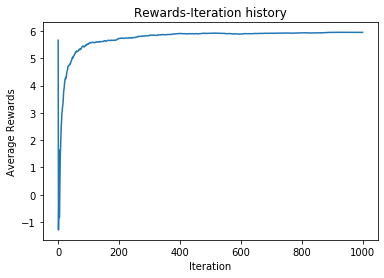

In [52]:
plt.plot(model1.Mean_Rewards[:])
plt.xlabel('Iteration')
plt.ylabel('Average Rewards')
plt.title('Rewards-Iteration history')
plt.show()

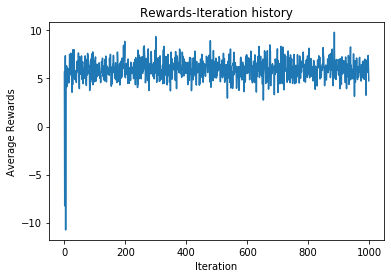

In [53]:
plt.plot(model1.Rewards)
plt.xlabel('Iteration')
plt.ylabel('Average Rewards')
plt.title('Rewards-Iteration history')
plt.show()

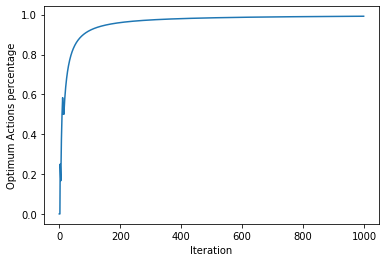

In [54]:
plt.plot(model1.optimum_actions_percentage)
plt.xlabel('Iteration')
plt.ylabel('Optimum Actions percentage')
#plt.title('Rewards-Iteration history')
plt.show()

## Averaging rewards in 200 episode, each episode 2000 actions

In [112]:
Optimistics = [50]*10

In [113]:
n_iter = 1000
n_episodes = 1

Average_Mean_Rewards_history_1 = np.zeros(n_iter)
Average_Mean_Rewards_history_2 = np.zeros(n_iter)

Average_Rewards_history_1 = np.zeros(n_iter)
Average_Rewards_history_2 = np.zeros(n_iter)

Bestaction_history_1 = np.zeros(n_iter)
Bestaction_history_2 = np.zeros(n_iter)

for i in range(n_episodes):
    
    mus = np.random.normal(loc = 0.0, scale = 10.0, size = 10)
    
    model_1 = K_ArmedBandits(mus, lrt = 0.1, n_iter=n_iter, eps=.1)
    Average_Mean_Rewards_history_1 += model_1.Mean_Rewards
    Average_Rewards_history_1 += model_1.Rewards
    Bestaction_history_1 += model_1.optimum_actions_percentage
    
    
    model_2 = K_ArmedBandits_Optimistic(mus, lrt = 0.1, initial_Q = Optimistics, n_iter=n_iter)
    Average_Mean_Rewards_history_2 += model_2.Mean_Rewards
    Average_Rewards_history_2 += model_2.Rewards
    Bestaction_history_2 += model_2.optimum_actions_percentage

In [114]:
mus

array([  8.68862873, -10.17421947,  -9.21147714,   1.1716291 ,
         1.90333105,  -2.383862  ,   1.84040086,   0.08773457,
       -10.04430535,   5.25886738])

In [115]:
model_1.Q

array([ 8.71242691, -9.85908498, -8.75349165,  1.75424419,  2.07791308,
       -2.38801032,  2.07477308,  0.0383177 , -9.6822721 ,  5.33167662])

In [116]:
model_2.Q

[8.747743694505635,
 -10.895772675946702,
 -9.420998847349168,
 1.7576435220476014,
 2.2022913096896346,
 -2.1002841145658735,
 1.8431001905338391,
 1.0408081640805733,
 -12.57310961420805,
 6.39530833205059]

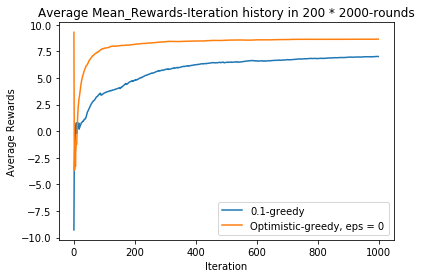

In [117]:
plt.plot(Average_Mean_Rewards_history_1[:]/n_episodes, label = "0.1-greedy")
plt.plot(Average_Mean_Rewards_history_2[:]/n_episodes, label = "Optimistic-greedy, eps = 0")
plt.xlabel('Iteration')
plt.ylabel('Average Rewards')
plt.title('Average Mean_Rewards-Iteration history in 200 * 2000-rounds')
plt.legend()
plt.show()

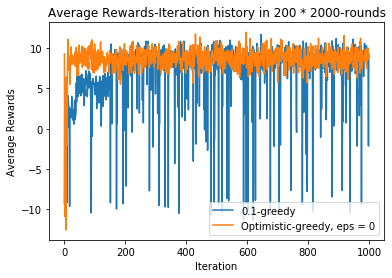

In [118]:
plt.plot(Average_Rewards_history_1[:], label = "0.1-greedy")
plt.plot(Average_Rewards_history_2[:], label = "Optimistic-greedy, eps = 0")
plt.xlabel('Iteration')
plt.ylabel('Average Rewards')
plt.title('Average Rewards-Iteration history in 200 * 2000-rounds')
plt.legend()
plt.show()

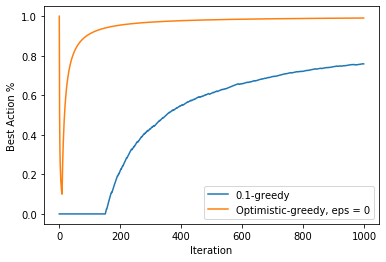

In [119]:
plt.plot(Bestaction_history_1[:], label = "0.1-greedy")
plt.plot(Bestaction_history_2[:], label = "Optimistic-greedy, eps = 0")
plt.xlabel('Iteration')
plt.ylabel('Best Action %')
#plt.title('Average Rewards-Iteration history in 200 * 2000-rounds')
plt.legend()
plt.show() 